#📌 Extracción

- Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [69]:
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [70]:
import pandas as pd

In [71]:
data=pd.read_json(url)

In [72]:
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Retirado`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [73]:
print(data.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [74]:
columnas=[data['customerID'], data['Churn']]
for i, j in enumerate(data.columns):
  columnas.append(pd.json_normalize(data[j]))

info_clientes=pd.concat(columnas,axis=1)

In [75]:
info_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [76]:
info_clientes=info_clientes.rename(columns={'Churn':'Retirado'})

In [77]:
info_clientes.dtypes

,0
customerID,object
Retirado,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [78]:
info_clientes.head(10)

,customerID,Retirado,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


#🔧 Transformación

In [79]:
import numpy as np

In [80]:
nulos=sum(info_clientes['Charges.Total'].isnull())
print("Nulos:", nulos)

Nulos: 0


In [81]:
duplicados=info_clientes.duplicated().sum()
print("Duplicados: ", duplicados)

Duplicados:  0


## Comprobación de incoherencias en los datos y Manejo de inconsistencias

In [82]:
chargestotal_vacios=info_clientes[info_clientes["Charges.Total"]==" "]
chargestotal_vacios[["Charges.Total","tenure"]]

,Charges.Total,tenure
975,,0
1775,,0
1955,,0
2075,,0
2232,,0
2308,,0
2930,,0
3134,,0
3203,,0
4169,,0


In [83]:
info_clientes['Charges.Total']=info_clientes['Charges.Total'].str.replace(r"^\s*$","0",regex=True)

In [84]:
info_clientes['Charges.Total']=info_clientes['Charges.Total'].astype(np.float64)

In [85]:
info_clientes.dtypes

,0
customerID,object
Retirado,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [86]:
for i in info_clientes.columns:
  print(i, ": ",info_clientes[i].unique())

customerID :  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Retirado :  ['No' 'Yes' '']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['Yes' 'No']
tenure :  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService :  ['Yes' 'No']
MultipleLines :  ['No' 'Yes' 'No phone service']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['Yes' 'No' 'No internet service']
StreamingTV :  ['Yes' 'No' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod 

In [87]:
#Revisamos que tanto porcentaje hay de vacios en la columna "Retirado"
distribucion_retirados=info_clientes["Retirado"].value_counts()
porcentaje_retirados=distribucion_retirados/distribucion_retirados.sum() *100
print(porcentaje_retirados)

Retirado
No     71.198569
Yes    25.719004
        3.082427
Name: count, dtype: float64


In [88]:
## obj_cols = info_clientes.select_dtypes(include="object").columns

In [89]:
Retirado_vacias=info_clientes.query("Retirado == ''")
Retirado_vacias

,customerID,Retirado,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [90]:
## Eliminamos los vacios de la columna "Retirado"
info_clientes.drop(info_clientes[info_clientes['Retirado']==''].index,inplace=True)

In [91]:
Retirado_vacias=info_clientes.query("Retirado == ''")
Retirado_vacias

,customerID,Retirado,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [92]:
Charges_Total_0=info_clientes[info_clientes['Charges.Total']==0]
Charges_Total_0

,customerID,Retirado,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


## Columna de cuentas diarias

In [93]:
info_clientes["Cuentas_Diarias"]=round(info_clientes['Charges.Monthly']/30,3)

In [94]:
info_clientes["Cuentas_Diarias"]

,Cuentas_Diarias
0,2.187
1,1.997
2,2.463
3,3.267
4,2.797
...,...
7262,1.838
7263,2.837
7264,1.677
7265,2.262


## Estandarización y transformación de datos

In [95]:
for columna in info_clientes.columns:
  if len(info_clientes[columna].unique())==2:
    info_clientes[columna]=info_clientes[columna].replace({"Yes":1,"No":0})

/tmp/ipython-input-755448035.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  info_clientes[columna]=info_clientes[columna].replace({"Yes":1,"No":0})


In [96]:
for i in info_clientes.columns:
  print(i, ": ",info_clientes[i].unique())

customerID :  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Retirado :  [0 1]
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [1 0]
tenure :  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService :  [1 0]
MultipleLines :  ['No' 'Yes' 'No phone service']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['Yes' 'No' 'No internet service']
StreamingTV :  ['Yes' 'No' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['One year' 'Month-to-month' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Mailed check' 'Electronic check' 

In [97]:
info_clientes.head(10)

,customerID,Retirado,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.187
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.997
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.267
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.797
5,0013-MHZWF,0,Female,0,0,1,9,1,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313
6,0013-SMEOE,0,Female,1,1,0,71,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),109.70,7904.25,3.657
7,0014-BMAQU,0,Male,0,1,0,63,1,Yes,Fiber optic,...,No,Yes,No,No,Two year,1,Credit card (automatic),84.65,5377.80,2.822
8,0015-UOCOJ,0,Female,1,0,0,7,1,No,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,48.20,340.35,1.607
9,0016-QLJIS,0,Female,0,1,1,65,1,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Mailed check,90.45,5957.90,3.015


In [98]:
info_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Retirado          7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#📊 Carga y análisis

## Análisis Descriptivo

### Atributos Numéricos

In [99]:
info_clientes.describe()

,Retirado,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158727
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958000


### Atributos Categóricos

In [100]:
obj_cols = info_clientes.select_dtypes(include="object")

In [101]:
obj_cols

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0002-ORFBO,Female,No,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check
1,0003-MKNFE,Male,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Mailed check
2,0004-TLHLJ,Male,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check
3,0011-IGKFF,Male,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check
4,0013-EXCHZ,Female,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Female,No,DSL,Yes,No,No,Yes,No,No,One year,Mailed check
7263,9992-RRAMN,Male,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Electronic check
7264,9992-UJOEL,Male,No,DSL,No,Yes,No,No,No,No,Month-to-month,Mailed check
7265,9993-LHIEB,Male,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Mailed check


In [102]:
obj_cols.describe()

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


## Distribución de evasión/Cancelación

In [103]:
Retirados_column=info_clientes.loc[:,"Retirado"]

In [104]:
Retirados_column

,Retirado
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [105]:
etiquetas=["Retirado" if i==1 else "No Retirado" for i in Retirados_column]

In [106]:
proporcion=Retirados_column.value_counts()

In [107]:
proporcion.index=["Activo","Inactivo"]

In [108]:
proporcion

,count
Activo,5174
Inactivo,1869


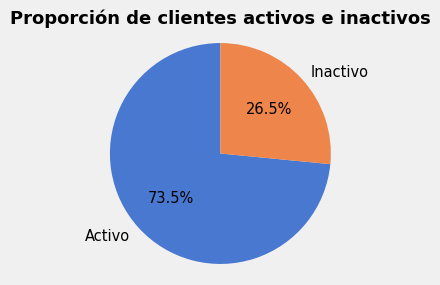

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  fig, ax= plt.subplots(figsize=(3,3))
  ax.pie(proporcion.values,labels=proporcion.index,autopct='%1.1f%%',startangle=90,textprops={"fontsize":10.5})
  ax.axis('equal')
  ax.set_title("Proporción de clientes activos e inactivos",fontsize=13,fontweight="bold")
  fig.savefig('/content/Proporcion de clientes activos e inactivos.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

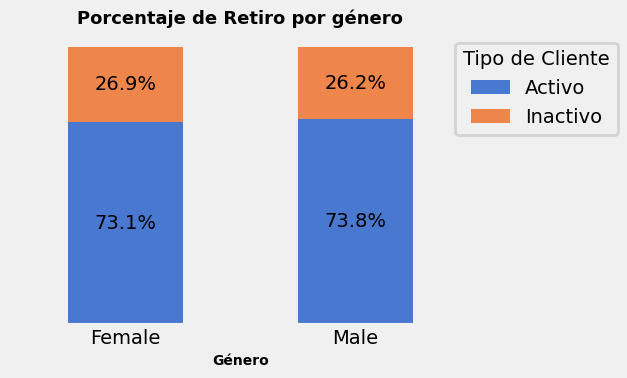

In [110]:
genero_Retirado=info_clientes.groupby(['gender','Retirado'])['Retirado'].value_counts()
genero_Retirado=genero_Retirado.unstack(level='Retirado')

genero_Retirado.columns.name = None
genero_Retirado.columns=["Activo","Inactivo"]
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  fig,ax= plt.subplots(figsize=(7,4))
  df_pct = round(genero_Retirado.div(genero_Retirado.sum(axis=1), axis=0) * 100,2)
  df_pct.plot(kind='bar',stacked=True,ax=ax)



  for container in ax.containers:
      ax.bar_label(container,
                  labels=[f"{v.get_height():.1f}%" for v in container],
                  label_type='center')

  plt.xticks(rotation=0)
  ax.grid(False)
  plt.xlabel('Género')
  plt.ylabel('Porcentaje')
  ax.set_title("Porcentaje de Retiro por género",fontsize=13,fontweight="bold")
  ax.set_xlabel("Género",fontsize=10,fontweight="bold")
  ax.set_ylabel("")
  ax.set(yticklabels=[])
  leg=ax.legend(title='Tipo de Cliente',loc='upper right',bbox_to_anchor=(1.34,1))
  leg.get_frame().set_linewidth(2)
  plt.tight_layout()
  fig.savefig('/content/Porcentaje de Cancelacion por genero.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

In [111]:
retirado_con_pareja=info_clientes.groupby("Retirado")['Partner'].value_counts()
retirado_con_pareja

Retirado  Partner
0         1          2733
          0          2441
1         0          1200
          1           669
Name: count, dtype: int64

In [112]:
retirado_senior=info_clientes.groupby("Retirado")['SeniorCitizen'].value_counts()
retirado_senior

Retirado  SeniorCitizen
0         0                4508
          1                 666
1         0                1393
          1                 476
Name: count, dtype: int64

PhoneService	MultipleLines	InternetService	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies


In [184]:
Retirado_dependents=info_clientes.groupby(['Retirado','Dependents'])['Partner'].value_counts()
Retirado_dependents

Retirado  Dependents  Partner
0         0           0          2157
                      1          1233
          1           1          1500
                      0           284
1         0           0          1123
                      1           420
          1           1           249
                      0            77
Name: count, dtype: int64

In [114]:
Retirado_contract=info_clientes.groupby('Retirado')['Contract'].value_counts()
Retirado_contract

Retirado  Contract      
0         Month-to-month    2220
          Two year          1647
          One year          1307
1         Month-to-month    1655
          One year           166
          Two year            48
Name: count, dtype: int64

In [115]:
Retirado_payment=info_clientes.groupby('Retirado')['PaymentMethod'].value_counts()
Retirado_payment

Retirado  PaymentMethod            
0         Mailed check                 1304
          Electronic check             1294
          Credit card (automatic)      1290
          Bank transfer (automatic)    1286
1         Electronic check             1071
          Mailed check                  308
          Bank transfer (automatic)     258
          Credit card (automatic)       232
Name: count, dtype: int64

In [116]:
InternetService_column=info_clientes.pop('InternetService')
info_clientes.insert(8,'InternetService',InternetService_column)


In [117]:
columnas=info_clientes.iloc[:,9:16].columns.to_list()
columnas
servicios=info_clientes.groupby('Retirado')[columnas].value_counts()


In [118]:
import seaborn as sns
sns.set_theme()

In [119]:
pd.crosstab(info_clientes['Contract'], info_clientes['Retirado'], normalize='index') * 100

Retirado,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [120]:
pd.crosstab(info_clientes['Partner'], info_clientes['Retirado'], normalize='index') * 100

Retirado,0,1
Partner,,
0,67.042021,32.957979
1,80.335097,19.664903


In [121]:
colores=["silver", "orange"]

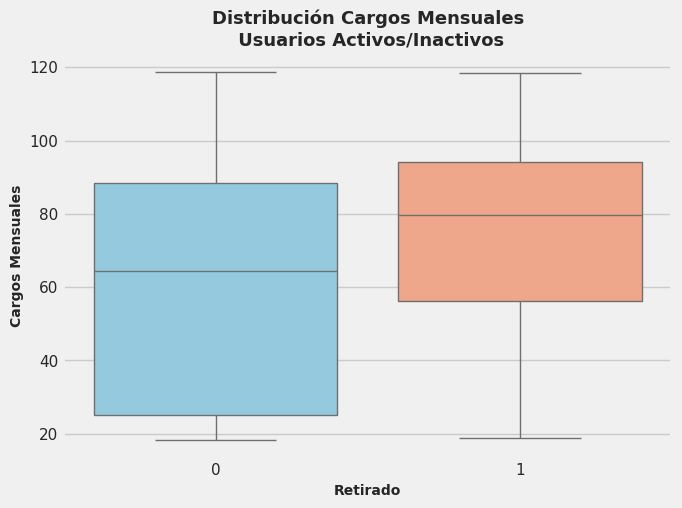

In [122]:
with plt.style.context('fivethirtyeight'):
  fig, ax= plt.subplots(figsize=(7,5))
  sns.boxplot(ax=ax,hue='Retirado',legend=False,x='Retirado', y='Charges.Monthly', data=info_clientes,palette={0: "skyblue", 1: "lightsalmon"})
  ax.set_title("Distribución Cargos Mensuales\n Usuarios Activos/Inactivos",fontsize=13,fontweight="bold")
  ax.set_ylabel("Cargos Mensuales",fontsize=10,fontweight="bold")
  ax.set_xlabel("Retirado",fontsize=10,fontweight="bold")
  fig.savefig('/content/Distribucion Cargos Mensuales Usuarios Activos-Inactivos.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

In [123]:
distribucion_Chargesmonthly=info_clientes.groupby('Retirado')['Charges.Monthly'].describe()
distribucion_Chargesmonthly

,count,mean,std,min,25%,50%,75%,max
Retirado,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


/tmp/ipython-input-289114375.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Un año","Mes a mes","Dos años"],fontsize=10)


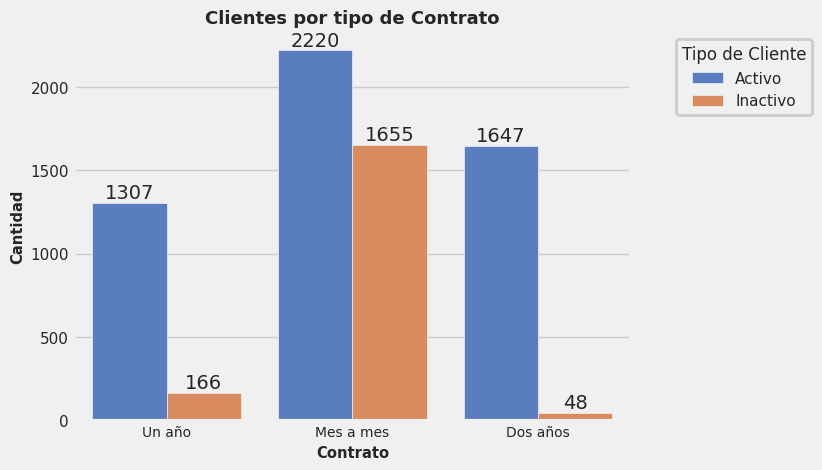

In [124]:
with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  fig,ax=plt.subplots()
  sns.countplot(x='Contract', hue='Retirado', data=info_clientes,ax=ax)
  ax.set_title("Clientes por tipo de Contrato",fontsize=13,fontweight="bold")
  ax.set_ylabel("Cantidad",fontsize=10.6,fontweight="bold")
  ax.set_xlabel("Contrato",fontsize=10.6,fontweight="bold")
  ax.set_xticklabels(["Un año","Mes a mes","Dos años"],fontsize=10)
  for container in ax.containers:
      ax.bar_label(container, label_type='edge')
  leg=ax.legend(title="Tipo de Cliente",bbox_to_anchor=(1.34,1.0),labels=["Activo","Inactivo"],framealpha=1)
  leg.get_frame().set_linewidth(2)
  fig.savefig('/content/Clientes por tipo de Contrato.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

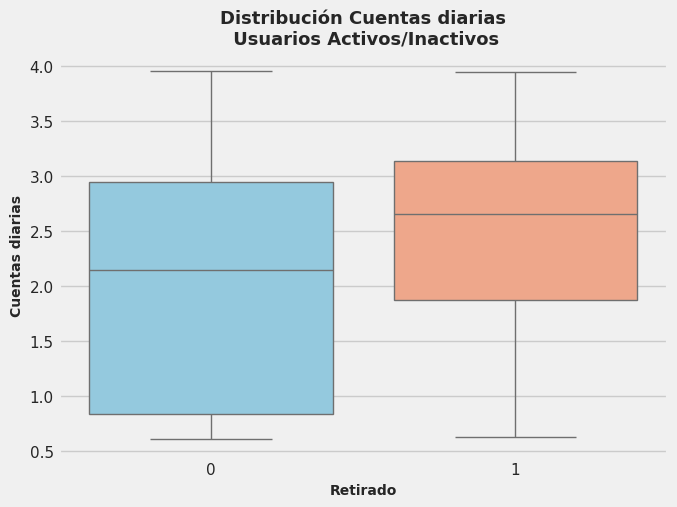

In [125]:
with plt.style.context('fivethirtyeight'):
  fig, ax= plt.subplots(figsize=(7,5))
  sns.boxplot(ax=ax,x='Retirado', y='Cuentas_Diarias', data=info_clientes,palette={0: "skyblue", 1: "lightsalmon"},hue='Retirado',legend=False)
  ax.set_title("Distribución Cuentas diarias\n Usuarios Activos/Inactivos",fontsize=13,fontweight="bold")
  ax.set_ylabel("Cuentas diarias",fontsize=10,fontweight="bold")
  ax.set_xlabel("Retirado",fontsize=10,fontweight="bold")
  fig.savefig('/content/Distribucion Cuentas diarias Usuarios Activos - Inactivos.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()


In [126]:
distribucion_Cuentas_Diarias=info_clientes.groupby('Retirado')['Cuentas_Diarias'].describe()
distribucion_Cuentas_Diarias

,count,mean,std,min,25%,50%,75%,max
Retirado,,,,,,,,
0,5174.0,2.042175,1.036424,0.608,0.837,2.1475,2.947,3.958
1,1869.0,2.481381,0.822209,0.628,1.872,2.6550,3.140,3.945


In [127]:
contract_internet=pd.crosstab([info_clientes['Contract'], info_clientes['InternetService']], info_clientes['Retirado'], normalize='index') * 100
contract_internet

Retirado                                0          1
Contract       InternetService                      
Month-to-month DSL              67.784137  32.215863
               Fiber optic      45.394737  54.605263
               No               81.106870  18.893130
One year       DSL              90.701754   9.298246
               Fiber optic      80.705009  19.294991
               No               97.527473   2.472527
Two year       DSL              98.089172   1.910828
               Fiber optic      92.773893   7.226107
               No               99.216301   0.783699

In [189]:
dp_parent=round(pd.crosstab([info_clientes['Retirado'], info_clientes['Dependents']], info_clientes['Partner'], normalize='index') * 100,2)
dp_parent

Partner                  0      1
Retirado Dependents              
0        0           63.63  36.37
         1           15.92  84.08
1        0           72.78  27.22
         1           23.62  76.38

In [202]:
contract_StreamingMovies=pd.crosstab([info_clientes['Contract'], info_clientes['SeniorCitizen']], info_clientes['Retirado'], normalize='index') * 100
contract_StreamingMovies

Retirado                              0          1
Contract       SeniorCitizen                      
Month-to-month 0              60.430248  39.569752
               1              45.353160  54.646840
One year       0              89.321902  10.678098
               1              84.736842  15.263158
Two year       0              97.290323   2.709677
               1              95.862069   4.137931

In [129]:
mes_to_mes_movies = info_clientes.query('Contract == "Month-to-month" & StreamingMovies == "Yes"').copy()
mes_to_mes_movies["Servicio"] = "StreamingMovies"

mes_to_mes_tv = info_clientes.query('Contract == "Month-to-month" & StreamingTV == "Yes"').copy()
mes_to_mes_tv["Servicio"] = "StreamingTV"

new_df=info_clientes.query('Contract == "Month-to-month" & Retirado==1').value_counts("StreamingMovies")
new_df2=info_clientes.query('Contract == "Month-to-month" & Retirado==1').value_counts("StreamingTV")
retirados_StreamingMovies_porcentaje=round((new_df / new_df.sum()) * 100,2)
retirados_StreamingTV_porcentaje=round((new_df2 / new_df2.sum()) * 100,2)
print(retirados_StreamingMovies_porcentaje,"\n")
print(retirados_StreamingTV_porcentaje)

StreamingMovies
No                     54.38
Yes                    39.64
No internet service     5.98
Name: count, dtype: float64 

StreamingTV
No                     54.32
Yes                    39.70
No internet service     5.98
Name: count, dtype: float64


StreamingMovies
No                     54.380665
Yes                    39.637462
No internet service     5.981873
Name: count, dtype: float64


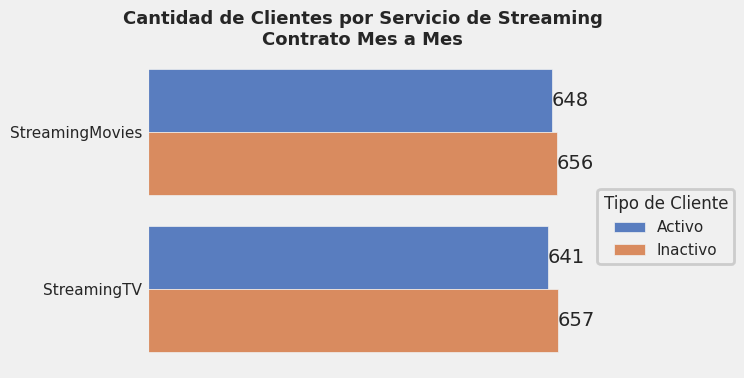

In [130]:
# Filtrar cada servicio
mes_to_mes_movies = info_clientes.query('Contract == "Month-to-month" & StreamingMovies == "Yes"').copy()
mes_to_mes_movies["Servicio"] = "StreamingMovies"

mes_to_mes_tv = info_clientes.query('Contract == "Month-to-month" & StreamingTV == "Yes"').copy()
mes_to_mes_tv["Servicio"] = "StreamingTV"
a=info_clientes.query('Contract == "Month-to-month" & Retirado==1')
b=a.value_counts("StreamingMovies")
b_pct=(b / b.sum()) * 100
print(b_pct)
df_servicios = pd.concat([mes_to_mes_movies, mes_to_mes_tv])

df_servicios["Retirado"] = df_servicios["Retirado"].replace({"0": "Activo", "1": "Inactivo"})


with plt.style.context('fivethirtyeight'):
  sns.set_palette("muted")
  fig,ax= plt.subplots(figsize=(9,4))
  ax = sns.countplot(
      data=df_servicios,
      y="Servicio",
      hue="Retirado",
      orient='h'
  )


  for container in ax.containers:
      ax.bar_label(container, label_type='edge')
  sns.despine()

  plt.title("Cantidad de Clientes por Servicio de Streaming\nContrato Mes a Mes", fontsize=13, fontweight="bold")
  plt.ylabel("")
  plt.xlabel("")

  ax.set(xticklabels=[])
  ax.spines['bottom'].set_visible(False)
  ax.grid(False)
  leg=ax.legend(title="Tipo de Cliente", loc="center right",bbox_to_anchor=(1.38, 0.45),labels=["Activo","Inactivo"],framealpha=1)
  leg.get_frame().set_linewidth(2)
  plt.tight_layout()
  fig.savefig('/content/Cantidad de Clientes por Servicio de Streaming Contrato Mes a Mes.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()


In [131]:
Retirados= info_clientes.query('Retirado==1')

In [132]:
Retirados_mas_antiguos2=Retirados[['customerID','tenure','StreamingMovies','StreamingTV']].sort_values('tenure',ascending=False).reset_index()
Retirados_mas_antiguos2.head(40)

,index,customerID,tenure,StreamingMovies,StreamingTV
0,2053,2889-FPWRM,72,Yes,Yes
1,6416,8809-RIHDD,72,Yes,Yes
2,2802,3886-CERTZ,72,Yes,Yes
3,6236,8580-QVLOC,72,Yes,Yes
4,4407,6034-ZRYCV,72,Yes,Yes
5,644,0917-EZOLA,72,Yes,Yes
6,5357,7317-GGVPB,71,Yes,Yes
7,4788,6559-ILWKJ,71,Yes,Yes
8,2007,2834-JRTUA,71,Yes,Yes
9,3860,5287-QWLKY,71,Yes,Yes


In [156]:
Retirados_mas_antiguos=Retirados[['customerID','tenure']].sort_values('tenure',ascending=False).reset_index()

Retirados_mas_antiguos.head(10)

,index,customerID,tenure
0,2053,2889-FPWRM,72
1,6416,8809-RIHDD,72
2,2802,3886-CERTZ,72
3,6236,8580-QVLOC,72
4,4407,6034-ZRYCV,72
5,644,0917-EZOLA,72
6,5357,7317-GGVPB,71
7,4788,6559-ILWKJ,71
8,2007,2834-JRTUA,71
9,3860,5287-QWLKY,71


In [153]:
Retirados_mas_antiguos.drop(columns=['index'],inplace=True)

In [154]:
Retirados_mas_antiguos

,customerID,tenure
0,0004-TLHLJ,4
1,0011-IGKFF,13
2,0013-EXCHZ,3
3,0022-TCJCI,45
4,0023-HGHWL,1
...,...,...
1864,9961-JBNMK,21
1865,9965-YOKZB,9
1866,9985-MWVIX,1
1867,9986-BONCE,4


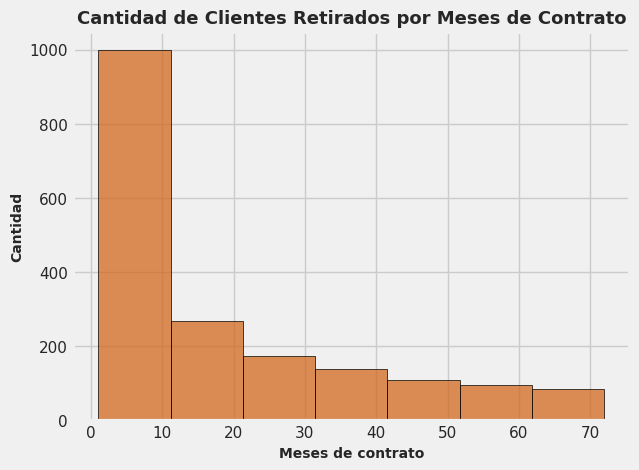

In [155]:
with plt.style.context('fivethirtyeight'):
  fig,ax=plt.subplots()
  sns.histplot(data=Retirados_mas_antiguos,x='tenure',bins=7,color="chocolate",edgecolor="black",ax=ax)
  ax.set_title("Cantidad de Clientes Retirados por Meses de Contrato",fontsize=13,fontweight="bold")
  ax.set_ylabel("Cantidad",fontsize=10,fontweight="bold")
  ax.set_xlabel("Meses de contrato",fontsize=10,fontweight="bold")
  fig.savefig('/content/Cantidad de Clientes Retirados por Meses de Contrato.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

In [180]:
inactivo_SeniorCitizen=Retirados['SeniorCitizen'].value_counts()
inactivo_SeniorCitizen.index=["Menores a 65 años","Mayores o iguales a 65 años"]
inactivo_SeniorCitizen

,count
Menores a 65 años,1393
Mayores o iguales a 65 años,476


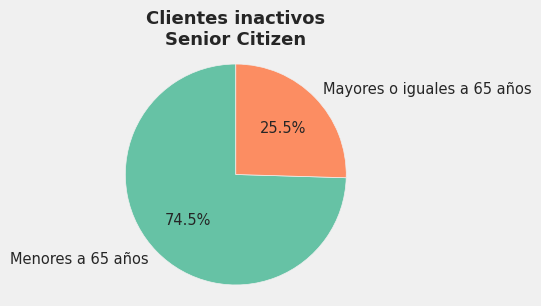

In [190]:
with plt.style.context('fivethirtyeight'):
  sns.set_palette("Set2")

  fig, ax= plt.subplots(figsize=(5,3))
  ax.pie(inactivo_SeniorCitizen.values,labels=inactivo_SeniorCitizen.index,autopct='%1.1f%%',startangle=90,textprops={"fontsize":10.5})
  ax.axis('equal')
  ax.set_title("Clientes inactivos\nSenior Citizen",fontsize=13,fontweight="bold")
  fig.savefig('/content/Clientes menores o mayores a 65 años.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

In [169]:
inactivo_dependents=Retirados['Dependents'].value_counts()
inactivo_dependents.index=["No","Si"]
inactivo_dependents

,count
No,1543
Si,326


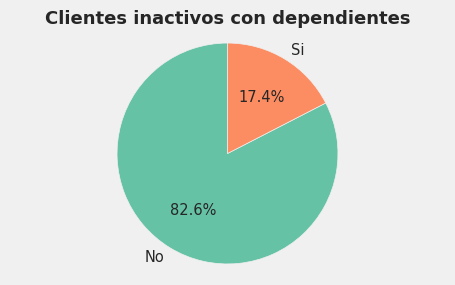

In [201]:
with plt.style.context('fivethirtyeight'):
  sns.set_palette("Set2")

  fig, ax= plt.subplots(figsize=(5,3))
  ax.pie(inactivo_dependents.values,labels=inactivo_dependents.index,autopct='%1.1f%%',startangle=90,textprops={"fontsize":10.5})
  ax.axis('equal')
  ax.set_title("Clientes inactivos con dependientes",fontsize=13,fontweight="bold")
  fig.savefig('/content/Clientes inactivos con dependientes.png',transparent=False,dpi=300,bbox_inches='tight')
  plt.show()

## Correlación entre variables

In [137]:
corr_val = info_clientes['tenure'].corr(info_clientes['Retirado'])
print(f"Correlación entre Tenure y Retirado: {corr_val:.2f}")

Correlación entre Tenure y Retirado: -0.35


In [138]:
corr_val = info_clientes['Cuentas_Diarias'].corr(info_clientes['Retirado'])
print(f"Correlación entre Cuentas Diarias y Retirado: {corr_val:.2f}")

Correlación entre Cuentas Diarias y Retirado: 0.19


In [139]:
info_clientes.loc[:,"OnlineSecurity":"StreamingMovies"]=info_clientes.loc[:,"OnlineSecurity":"StreamingMovies"].replace({"Yes":1,"No":0})


In [140]:
info_clientes["HaveInternet"]= np.where((info_clientes['InternetService'] == 'DSL') | (info_clientes['InternetService'] == 'Fiber optic'), 1, 0)

In [141]:
HaveInternet_column=info_clientes.pop('HaveInternet')
info_clientes.insert(8,'HaveInternet',HaveInternet_column)

In [142]:
InternetService_column=info_clientes.pop('InternetService')
info_clientes.insert(6,'InternetService',InternetService_column)

In [143]:
InternetService_column=info_clientes.pop('InternetService')
info_clientes.insert(6,'InternetService',InternetService_column)

In [144]:
info_clientes["MultipleLines"]=info_clientes["MultipleLines"].replace({"Yes":1,"No":0})

In [145]:
info_clientes.to_csv("hola.csv")

In [146]:
info_clientes["Cantidad de servicios"]=info_clientes.loc[:,"OnlineSecurity":"StreamingMovies"].sum(axis=1)

In [147]:
services=info_clientes.loc[:,"PhoneService":"StreamingMovies"]
services_numeric = services.apply(pd.to_numeric, errors='coerce')

In [148]:
una_column=info_clientes.pop('Cantidad de servicios')

In [149]:
info_clientes['Cantidad de servicios'] = services_numeric.sum(axis=1, min_count=1)

In [150]:
info_clientes.to_csv("Hola2.csv")

In [151]:
corr_val = info_clientes['Cantidad de servicios'].corr(info_clientes['Retirado'])
print(f"Correlación entre Cantidad de servicios y Retirado: {corr_val:.2f}")

Correlación entre Cantidad de servicios y Retirado: -0.02


#📄Informe final